# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df_raw = pd.read_csv("data/checker_submits.csv")
df_raw

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [3]:
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])
df_raw['hour'] = df_raw['timestamp'].dt.hour
df_raw['dayofweek'] = df_raw['timestamp'].dt.dayofweek
df = df_raw[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']].copy()
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [4]:
categorical_features = ['uid', 'labname']

# OneHotEncoder'ni yaratamiz va qo'llaymiz
# OneHotEncoder — bu scikit-learn kutubxonasidagi kategorik (nominal) ustunlarni sonli ustunlarga aylantiruvchi kodlovchi (encoder) vositadir.
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # sparse=False - natijani zich (numpy array) holatida qaytaradi
encoded_features = encoder.fit_transform(df[categorical_features])

# Yangi kodlangan ustun nomlarini olamiz
encoded_feature_names = encoder.get_feature_names(categorical_features)

df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

df = df.drop(columns=categorical_features)

# Kodlangan xususiyatlarni asl DataFrame'ga qo'shamiz
df = pd.concat([df, df_encoded], axis=1)

In [5]:
continuous_features = ['numTrials', 'hour']

scaler = StandardScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df.to_csv("data/dayofweek.csv", index=False)

In [7]:
y_target = df_raw['dayofweek']

most_popular_class = y_target.mode()[0]
print(f"\nEng mashhur kun: {most_popular_class} (0=Dushanba, 6=Yakshanba)")

y_pred_naive = np.full_like(y_target, most_popular_class)

accuracy_naive_classifier = accuracy_score(y_target, y_pred_naive)
print(f"Naive Classifier (eng mashhur sinf) aniqligi: {accuracy_naive_classifier}")


Eng mashhur kun: 3 (0=Dushanba, 6=Yakshanba)
Naive Classifier (eng mashhur sinf) aniqligi: 0.23487544483985764


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [8]:
y = df['dayofweek']
X = df.drop(columns=['dayofweek'])

In [9]:
logistic_model = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear', multi_class='ovr')
logistic_model.fit(X, y)

LogisticRegression(fit_intercept=False, multi_class='ovr', random_state=21,
                   solver='liblinear')

In [10]:
# Modelning bashoratlarini olamiz
y_pred_logistic = logistic_model.predict(X)

# Aniqlikni hisoblaymiz
accuracy_logistic = accuracy_score(y, y_pred_logistic)
print(f"Logistik Regressiya modelining aniqligi: {accuracy_logistic}")

Logistik Regressiya modelining aniqligi: 0.6215895610913404


In [11]:
def plot_feature_importance(model_coefs, feature_names, top_n=10, title="Feature Importance"):
    """
    Model koeffitsientlari asosida xususiyat muhimligini gorizontal ustunli grafikda chizadi.

    Args:
        model_coefs (numpy.ndarray): Modelning koeffitsientlari.
                                     Agar multiclass bo'lsa (n_classes, n_features) matritsa.
        feature_names (list): Xususiyat nomlari ro'yxati.
        top_n (int): Ko'rsatiladigan eng muhim xususiyatlarning soni.
        title (str): Grafik sarlavhasi.
    """
    # Har bir xususiyatning umumiy muhimligini hisoblash uchun absolyut qiymatlarni sinflar bo'yicha yig'amiz.
    if model_coefs.ndim > 1:
        # Har bir sinf uchun koeffitsientlarning absolyut qiymatlarini yig'amiz
        feature_importances = np.sum(np.abs(model_coefs), axis=0)
    else:
        # Binary classification (bir o'lchamli massiv)
        feature_importances = np.abs(model_coefs)

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Muhimlik bo'yicha tartiblaymiz va top-n tasini olamiz
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature',legend=False, palette='viridis')
    plt.title(title)
    plt.xlabel('Absolute Sum of Coefficients (Importance)')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

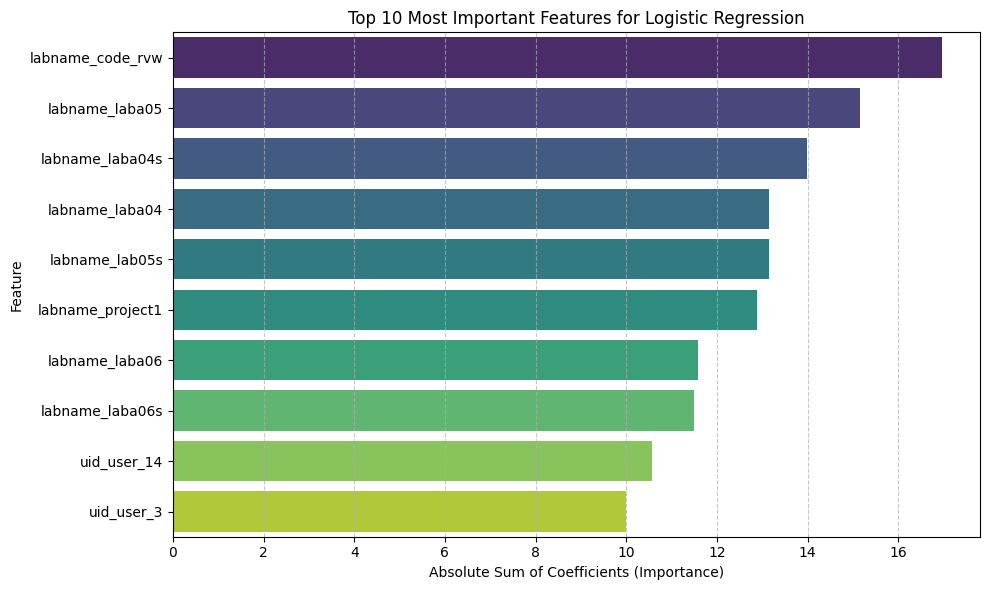

In [12]:
feature_names = X.columns.tolist()

plot_feature_importance(
    logistic_model.coef_,
    feature_names,
    top_n=10,
    title='Top 10 Most Important Features for Logistic Regression'
)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [13]:
y = df['dayofweek']
X = df.drop(columns=['dayofweek'])

In [14]:
base_svc_estimator = SVC(kernel='linear', probability=True, random_state=21)
svc_model_linear = OneVsRestClassifier(base_svc_estimator)

# Modelni o'qitamiz
svc_model_linear.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

In [15]:
y_pred_svc_linear = svc_model_linear.predict(X)

# Aniqlikni hisoblaymiz
accuracy_svc_linear = accuracy_score(y, y_pred_svc_linear)
print(f"SVC (linear kernel, baseline) modelining aniqligi: {accuracy_svc_linear}")

SVC (linear kernel, baseline) modelining aniqligi: 0.6120996441281139


In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = {}

print("\nTurli SVC kernellari bilan aniqliklar:")
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=21)
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    kernel_accuracies[kernel] = acc
    print(f"  Kernel: {kernel}, Accuracy: {acc:.4f}")

best_kernel_acc = max(kernel_accuracies, key=kernel_accuracies.get)
print(f"\nEng yaxshi kernel: {best_kernel_acc} (Accuracy: {kernel_accuracies[best_kernel_acc]:.4f})")


Turli SVC kernellari bilan aniqliklar:
  Kernel: linear, Accuracy: 0.7028
  Kernel: poly, Accuracy: 0.8594
  Kernel: rbf, Accuracy: 0.8559
  Kernel: sigmoid, Accuracy: 0.3998

Eng yaxshi kernel: poly (Accuracy: 0.8594)


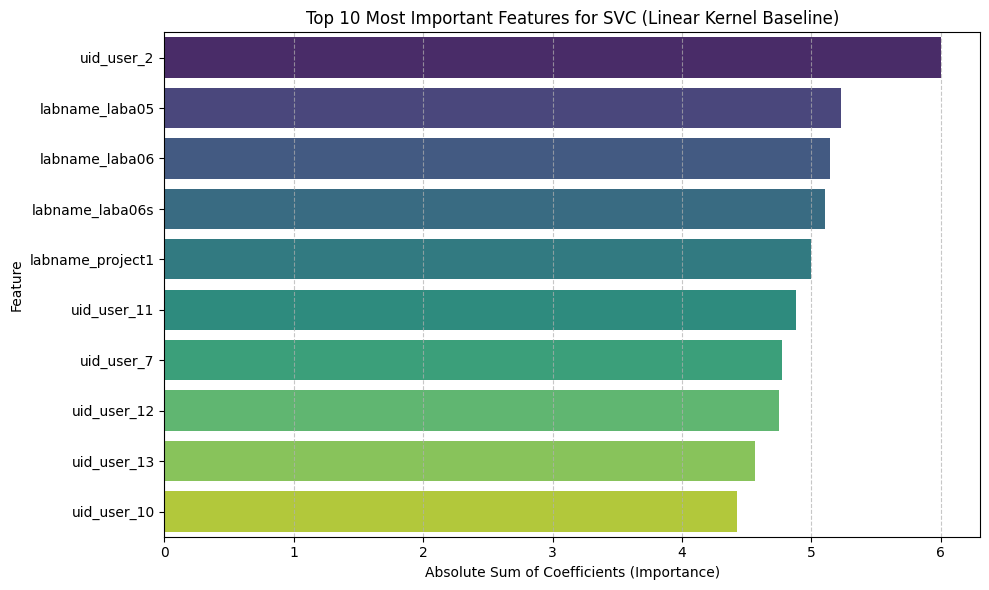

In [17]:

# Baza SVC modelini (linear kernel) OneVsRestClassifier ichida yaratamiz va o'qitamiz
base_svc_estimator = SVC(kernel='linear', probability=True, random_state=21)
svc_model_linear = OneVsRestClassifier(base_svc_estimator)
svc_model_linear.fit(X, y)

feature_names = X.columns.tolist()

def plot_feature_importance(model_coefs, feature_names, top_n=10, title="Feature Importance"):
    # Koeffitsientlar matritsa bo'lishi mumkin (n_classes, n_features)
    if model_coefs.ndim > 1:
        # Har bir sinf uchun koeffitsientlarning absolyut qiymatlarini yig'amiz
        feature_importances = np.sum(np.abs(model_coefs), axis=0)
    else:
        # Binary classification (bir o'lchamli massiv)
        feature_importances = np.abs(model_coefs)

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', legend=False, palette='viridis')
    plt.title(title)
    plt.xlabel('Absolute Sum of Coefficients (Importance)')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# SVC (linear kernel) modelining koeffitsientlarini olamiz.
# svc_model_linear.estimators_ bu OneVsRestClassifier ichidagi o'qitilgan estimatorlar ro'yxati.
# Har bir estimatorning coef_ atributi (shape: (1, n_features)) bor.
# Ularni vertikal ravishda yig'ib, (n_classes, n_features) matritsasini hosil qilamiz.
svc_linear_coefs = np.vstack([estimator.coef_ for estimator in svc_model_linear.estimators_])

plot_feature_importance(
    svc_linear_coefs,
    feature_names,
    top_n=10,
    title='Top 10 Most Important Features for SVC (Linear Kernel Baseline)'
)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [18]:
dt_model_baseline = DecisionTreeClassifier(max_depth=4, random_state=21)
dt_model_baseline.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=21)

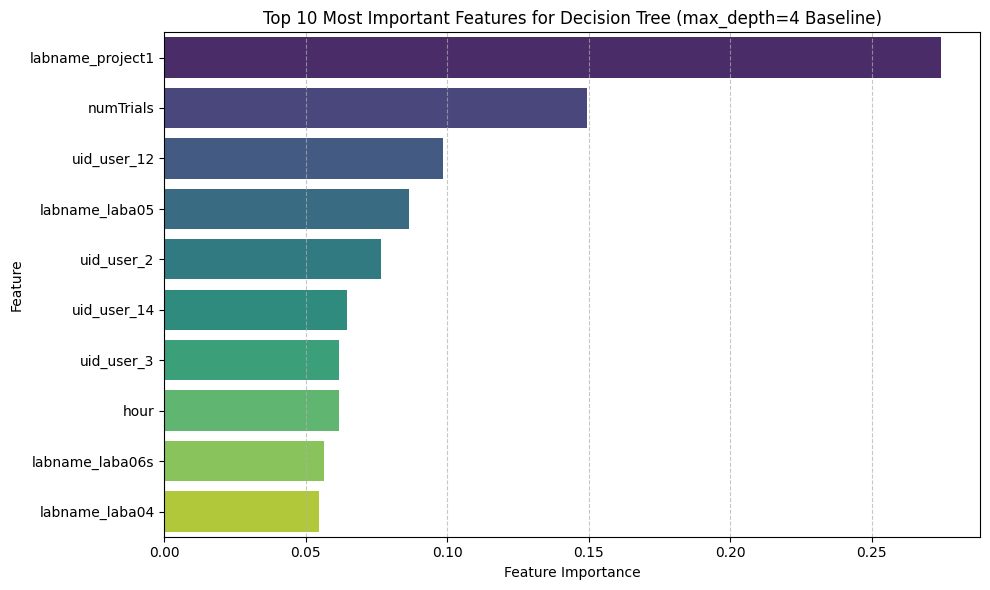

In [19]:
feature_names = X.columns.tolist()

# Decision Tree modelining feature_importances_ atributini olamiz
dt_feature_importances = dt_model_baseline.feature_importances_

top_n = 10
title = 'Top 10 Most Important Features for Decision Tree (max_depth=4 Baseline)'

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', legend=False, palette='viridis')
plt.title(title)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [20]:
rf_model_baseline = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf_model_baseline.fit(X, y)

RandomForestClassifier(max_depth=25, random_state=21)

In [21]:
y_pred_rf_baseline = rf_model_baseline.predict(X)

accuracy_rf_baseline = accuracy_score(y, y_pred_rf_baseline)
print(f"RandomForestClassifier (baseline) modelining aniqligi: {accuracy_rf_baseline}")

RandomForestClassifier (baseline) modelining aniqligi: 1.0


In [22]:
max_depths = [5, 10, 15, 20, 25, 30, None]
n_estimators_list = [50, 100, 200, 300]
rf_accuracies = {}
best_accuracy_rf = 0
best_params_rf = {}

print("\nTurli max_depth va n_estimators qiymatlari bilan RandomForestClassifier aniqliklari:")
for depth in max_depths:
    for n_est in n_estimators_list:
        model = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=21)
        model.fit(X, y)
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        rf_accuracies[(n_est, depth)] = acc
        print(f"  n_estimators: {n_est}, Max Depth: {depth}, Accuracy: {acc}")

        if acc > best_accuracy_rf:
            best_accuracy_rf = acc
            best_params_rf = {'n_estimators': n_est, 'max_depth': depth}

print(f"\nEng yaxshi parametrlar: {best_params_rf} (Accuracy: {best_accuracy_rf})")


Turli max_depth va n_estimators qiymatlari bilan RandomForestClassifier aniqliklari:
  n_estimators: 50, Max Depth: 5, Accuracy: 0.5848161328588375
  n_estimators: 100, Max Depth: 5, Accuracy: 0.5794780545670225
  n_estimators: 200, Max Depth: 5, Accuracy: 0.5854092526690391
  n_estimators: 300, Max Depth: 5, Accuracy: 0.5966785290628707
  n_estimators: 50, Max Depth: 10, Accuracy: 0.8701067615658363
  n_estimators: 100, Max Depth: 10, Accuracy: 0.8855278766310795
  n_estimators: 200, Max Depth: 10, Accuracy: 0.8778173190984578
  n_estimators: 300, Max Depth: 10, Accuracy: 0.8742586002372479
  n_estimators: 50, Max Depth: 15, Accuracy: 0.9786476868327402
  n_estimators: 100, Max Depth: 15, Accuracy: 0.9780545670225386
  n_estimators: 200, Max Depth: 15, Accuracy: 0.9792408066429419
  n_estimators: 300, Max Depth: 15, Accuracy: 0.9798339264531435
  n_estimators: 50, Max Depth: 20, Accuracy: 0.9970344009489917
  n_estimators: 100, Max Depth: 20, Accuracy: 0.99644128113879
  n_estimators

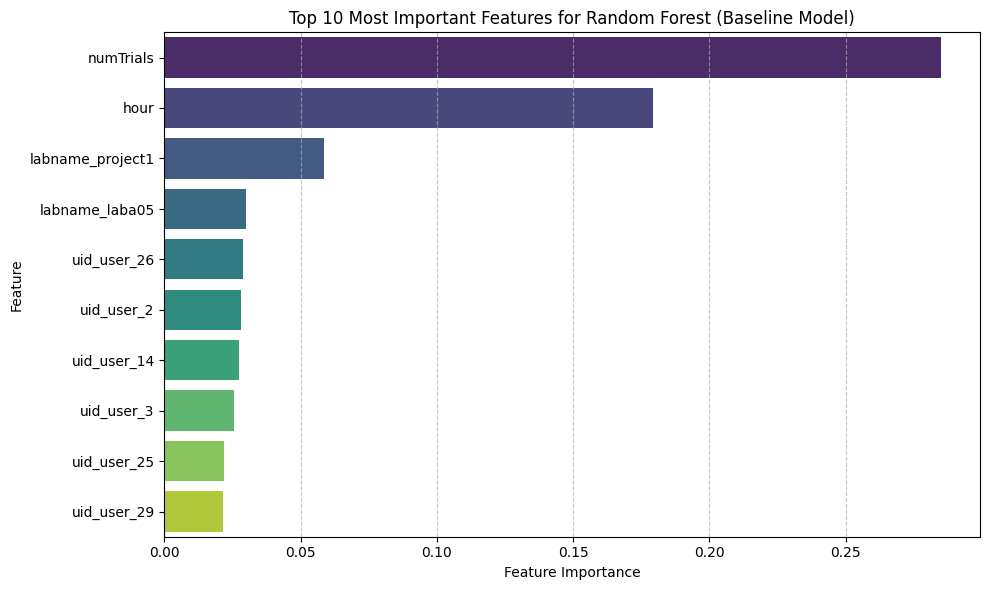

In [23]:
def plot_feature_importance_generic(feature_importances, feature_names, top_n=10, title="Feature Importance"):
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', legend=False, palette='viridis')
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

feature_names = X.columns.tolist()

# Random Forest modelining feature_importances_ atributini olamiz
rf_feature_importances = rf_model_baseline.feature_importances_

plot_feature_importance_generic(
    rf_feature_importances,
    feature_names,
    top_n=10,
    title='Top 10 Most Important Features for Random Forest (Baseline Model)'
)